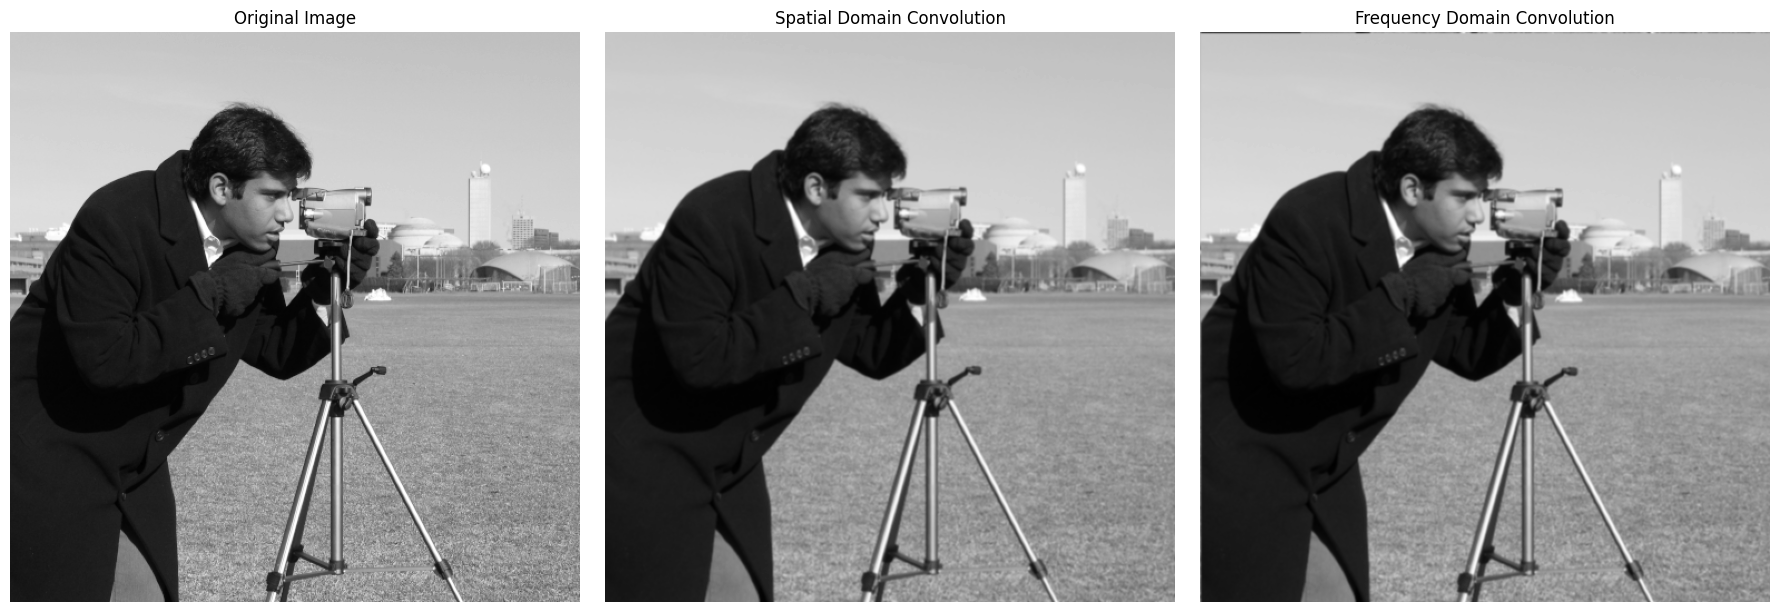

In [1]:
#Frequency Domain
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.fftpack import fft2, ifft2, fftshift
from skimage import data, color

# Load a sample grayscale image
image = data.camera()

# Define a 2D convolution filter (e.g., Gaussian-like filter)
filter_kernel = np.array([[1, 2, 1],
                          [2, 4, 2],
                          [1, 2, 1]])
filter_kernel = filter_kernel / filter_kernel.sum()  # To normalize the kernel

# Spatial domain convolution (for comparison)
spatial_convolution = convolve(image, filter_kernel)
spatial_convolution = (spatial_convolution - spatial_convolution.min()) / (spatial_convolution.max() - spatial_convolution.min()) * 255

# Frequency domain convolution
# 1. Compute the Fourier transform of the image and filter
image_fft = np.fft.fft2(image)
filter_fft = np.fft.fft2(filter_kernel, s=image.shape)  # Pad filter to image size

# 2. Multiply in frequency domain (convolution theorem)
convolution_fft = image_fft * filter_fft

# 3. Inverse Fourier transform to get the convolved image
frequency_convolution = np.abs(ifft2(convolution_fft))
frequency_convolution = (frequency_convolution - frequency_convolution.min()) / (frequency_convolution.max() - frequency_convolution.min()) * 255

# Visualization
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(spatial_convolution, cmap='gray')
plt.title("Spatial Domain Convolution")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(frequency_convolution, cmap='gray')
plt.title("Frequency Domain Convolution")
plt.axis("off")

plt.tight_layout()
plt.show()